In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [239]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [240]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Feature Engineering

In [241]:
#split cabin into two columns
train['Cabin'] = train['Cabin'].fillna('00')

train['CabinDeck'] = train['Cabin'].map(lambda x: x[0])
train['CabinSide'] = train['Cabin'].map(lambda x: x[-1])

train['CabinDeck'] = train['CabinDeck'].replace('0', np.nan)
train['CabinSide'] = train['CabinSide'].replace('0', np.nan)

train.drop('Cabin', axis=1, inplace=True)

### Examination of data

In [242]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


In [243]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [244]:
train.shape

(8693, 15)

In [245]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
CabinDeck       199
CabinSide       199
dtype: int64

<AxesSubplot:>

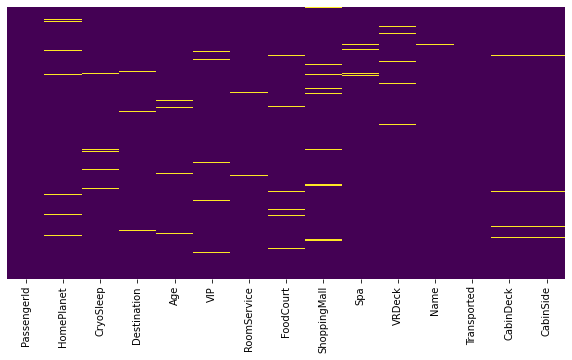

In [246]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [247]:
#percentage of missing values
train.isnull().sum()/train.shape[0]*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
CabinDeck       2.289198
CabinSide       2.289198
dtype: float64

In [248]:
# we dropped name column becausea all variables are unique so it will not help in prediction
train.drop('Name',axis=1,inplace=True)

In [249]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
CabinDeck        object
CabinSide        object
dtype: object

In [250]:
for i in train.columns:
    if train[i].dtype == 'object':
        print(i,':',train[i].unique())

PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet : ['Europa' 'Earth' 'Mars' nan]
CryoSleep : [False True nan]
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP : [False True nan]
CabinDeck : ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
CabinSide : ['P' 'S' nan]


In [251]:
for i in train.columns[1:]:
    if train[i].dtype == 'object':
        print(i)
        print(train[i].value_counts())
        print()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

CryoSleep
False    5439
True     3037
Name: CryoSleep, dtype: int64

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

VIP
False    8291
True      199
Name: VIP, dtype: int64

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

CabinSide
S    4288
P    4206
Name: CabinSide, dtype: int64



In [252]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


#### Handling null values

In [253]:
for i in train.columns:
    if train[i].dtype == 'object':
        train[i] = train[i].fillna(train[i].mode()[0])

In [254]:
for i in train.columns:
    if train[i].dtype == 'float64':
        train[i] = train[i].fillna(train[i].mean())

In [255]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinSide       0
dtype: int64

# Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x22ad4245280>,
 [Text(-0.013091190901227618, 1.1499254848557745, 'Not Transported'),
  Text(0.013091190901227477, -1.1499254848557745, 'Transported')],
 [Text(-0.007399368770259088, 0.6499578827445681, '50.4%'),
  Text(0.007399368770259008, -0.6499578827445681, '49.6%')])

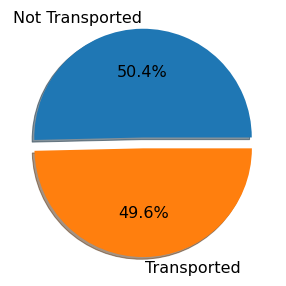

In [256]:
plt.figure(figsize=(5,5))

plt.pie(train['Transported'].value_counts(), labels=['Not Transported', 'Transported'], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16},explode=[0.05,0.05])

Text(0.5, 0, 'Age (years)')

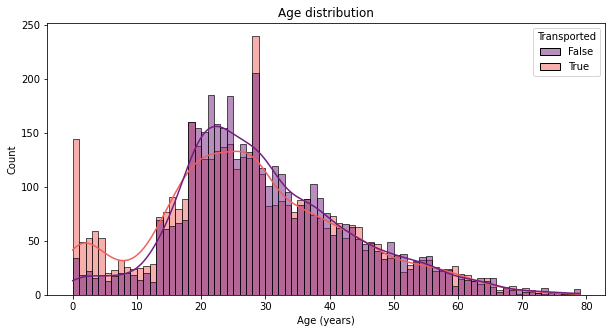

In [257]:
plt.figure(figsize=(10,5))

sns.histplot(data=train,x='Age',kde=True,binwidth=1,hue='Transported',palette='magma')

plt.title('Age distribution')
plt.xlabel('Age (years)')


### visualizing of categorical variables

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

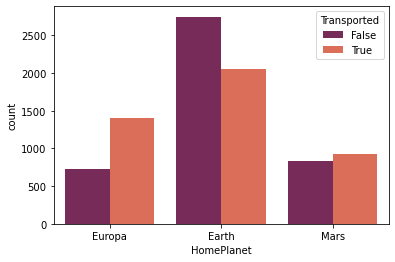

In [258]:
sns.countplot(data = train, x ="HomePlanet", hue = "Transported", palette = "rocket")

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

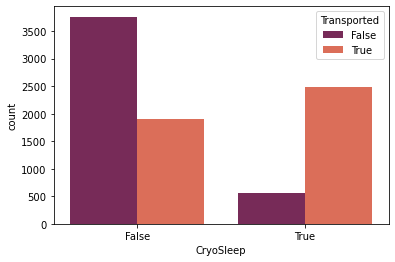

In [259]:
sns.countplot(data = train, x ="CryoSleep", hue = "Transported", palette = "rocket")

<AxesSubplot:xlabel='Destination', ylabel='count'>

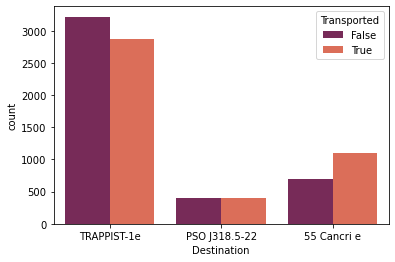

In [260]:
sns.countplot(data = train, x ="Destination", hue = "Transported", palette = "rocket")

<AxesSubplot:xlabel='VIP', ylabel='count'>

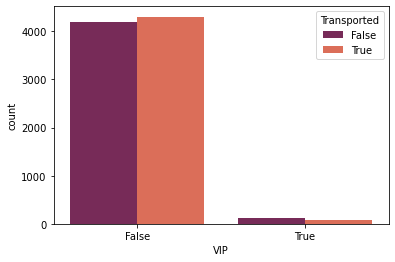

In [261]:
sns.countplot(data = train, x ="VIP", hue = "Transported", palette = "rocket")

<AxesSubplot:xlabel='CabinDeck', ylabel='count'>

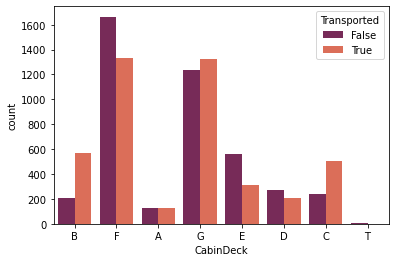

In [262]:
sns.countplot(data = train, x ="CabinDeck", hue = "Transported", palette = "rocket")

<AxesSubplot:xlabel='CabinSide', ylabel='count'>

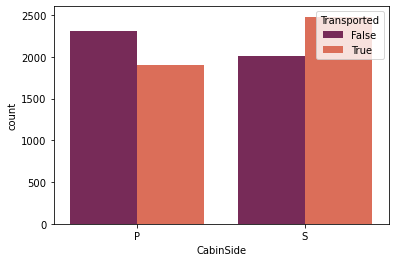

In [263]:
sns.countplot(data = train, x ="CabinSide", hue = "Transported", palette = "rocket")

#### correlation matrix

<AxesSubplot:>

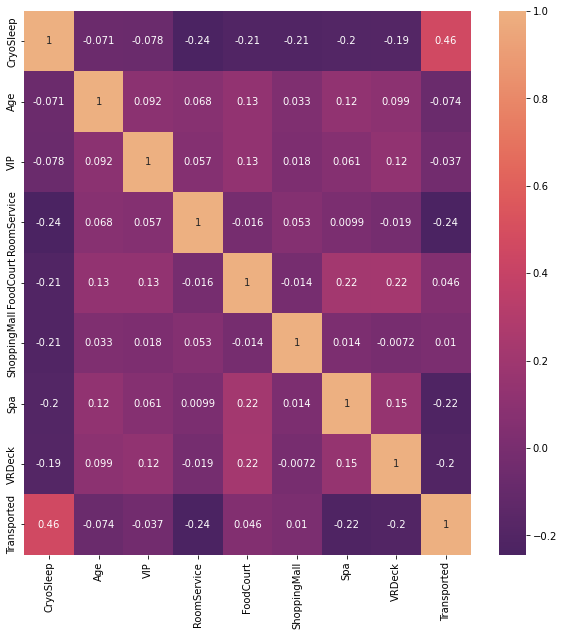

In [264]:
corr = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='flare_r')


In [265]:
corr['Transported'].sort_values(ascending=False)


Transported     1.000000
CryoSleep       0.460132
FoodCourt       0.046074
ShoppingMall    0.010019
VIP            -0.037261
Age            -0.074249
VRDeck         -0.204825
Spa            -0.218791
RoomService    -0.242048
Name: Transported, dtype: float64

In [266]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


# Handling Test Data

In [267]:
test = pd.read_csv('test.csv')

In [268]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [269]:
test.drop('Name',axis=1,inplace=True)

In [270]:
test["Cabin"] = test["Cabin"].fillna("00")

test['CabinDeck'] = test['Cabin'].map(lambda x: x[0])
test['CabinSide'] = test['Cabin'].map(lambda x: x[-1])

test['CabinDeck'] = test['CabinDeck'].replace('0', np.nan)
test['CabinSide'] = test['CabinSide'].replace('0', np.nan)

test.drop('Cabin', axis=1, inplace=True)

In [271]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S


In [272]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
CabinDeck       100
CabinSide       100
dtype: int64

In [273]:
test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
CabinDeck        object
CabinSide        object
dtype: object

In [274]:
for i in test.columns:
    if test[i].dtype == 'object':
        test[i] = test[i].fillna(test[i].mode()[0])

In [275]:
for i in test.columns:
    if test[i].dtype == 'float64':
        test[i] = test[i].fillna(test[i].mean())

In [276]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
CabinDeck       0
CabinSide       0
dtype: int64

In [277]:
test.shape   

(4277, 13)

In [278]:
train.shape

(8693, 14)

In [279]:
passenger_id_test = test['PassengerId']

test.drop('PassengerId',axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace=True)

## Encoding

In [280]:
Y_train = train["Transported"]
Y_train = Y_train.astype('int') # converting to bool to int 0 = False, 1 = True

X_train = train.drop("Transported", axis=1)
X_train["CryoSleep"] = X_train["CryoSleep"].astype('int')
X_train["VIP"] = X_train["VIP"].astype('int')

test["CryoSleep"] = test["CryoSleep"].astype('int')
test["VIP"] = test["VIP"].astype('int')

In [281]:
Y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int32

In [282]:
print("shape of X_train: ",X_train.shape)
print("shape of Y_train: ",Y_train.shape)
print("shape of test: ",test.shape)

shape of X_train:  (8693, 12)
shape of Y_train:  (8693,)
shape of test:  (4277, 12)


In [283]:
#combined both x data for preprocessing
X_train["train"] = 1
test["train"] = 0

combined = pd.concat([X_train, test])

In [284]:
combined_num = []
combined_cat = []

for i in range(len(combined.columns)):
    if combined.dtypes[i] == 'object':
        combined_cat.append(combined.columns[i])
    else:
        combined_num.append(combined.columns[i])

print("Numerical columns: ",combined_num)
print("Categorical columns: ",combined_cat)

Numerical columns:  ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'train']
Categorical columns:  ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']


In [285]:
for i in combined_cat:
    dataframe = pd.get_dummies(combined[i], drop_first=True)
    combined.drop(i, axis=1, inplace=True)
    combined = pd.concat([combined, dataframe], axis=1)

In [286]:
print("shape of combined: ",combined.shape)
combined.head()

shape of combined:  (12970, 21)


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,train,Europa,...,PSO J318.5-22,TRAPPIST-1e,B,C,D,E,F,G,T,S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,1,...,0,1,1,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,1,...,0,1,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [287]:
print(combined.shape)
combined.dtypes

(12970, 21)


CryoSleep          int32
Age              float64
VIP                int32
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
train              int64
Europa             uint8
Mars               uint8
PSO J318.5-22      uint8
TRAPPIST-1e        uint8
B                  uint8
C                  uint8
D                  uint8
E                  uint8
F                  uint8
G                  uint8
T                  uint8
S                  uint8
dtype: object

In [288]:
X_train = combined[combined["train"] == 1]
test = combined[combined["train"] == 0]

X_train.drop("train", axis=1, inplace=True)
test.drop("train", axis=1, inplace=True)

In [289]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,B,C,D,E,F,G,T,S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,0,1,0,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,0,0,0,1,0,0,0,0,1,0,0,1


In [290]:
X_train.shape


(8693, 20)

In [291]:
test.shape

(4277, 20)

### Scaling

In [292]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
test = scaler.transform(test)

# Model Selection

In [293]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [294]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', n_estimators=1000, learning_rate=0.05, max_depth=5, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(x_train, y_train, eval_metric='rmse')

preds = xgb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, preds))
scores = cross_val_score(xgb, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
print("Cross Validation Score: ", scores.mean(),"\n")
print(classification_report(y_test, preds))

Accuracy:  0.7918343875790684


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Cross Validation Score:  0.8004036224650761 

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       861
           1       0.79      0.81      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s finished


In [295]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma=0.1)
svc.fit(x_train, y_train)

preds = svc.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, preds))
scores = cross_val_score(svc, x_train, y_train, cv=5)
print("Cross Validation Score: ", scores.mean(),"\n")
print(classification_report(y_test, preds))

Accuracy:  0.7883841288096607
Cross Validation Score:  0.8009800929924644 

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       861
           1       0.78      0.80      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [296]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

preds = rfc.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, preds))
scores = cross_val_score(rfc, x_train, y_train, cv=5)
print("Cross Validation Score: ", scores.mean(),"\n")
print(classification_report(y_test, preds))

Accuracy:  0.7883841288096607
Cross Validation Score:  0.7903366451339288 

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       861
           1       0.81      0.76      0.78       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [297]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

preds = lr.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, preds))
scores = cross_val_score(lr, x_train, y_train, cv=5)
print("Cross Validation Score: ", scores.mean(),"\n")
print(classification_report(y_test, preds))

Accuracy:  0.7826336975273146
Cross Validation Score:  0.7949409616806914 

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       861
           1       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [298]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

preds = knn.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, preds))
scores = cross_val_score(knn, x_train, y_train, cv=5)
print("Cross Validation Score: ", scores.mean(),"\n")
print(classification_report(y_test, preds))

Accuracy:  0.7768832662449684
Cross Validation Score:  0.7745207888326291 

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       861
           1       0.78      0.78      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [299]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

preds = gnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, preds))
scores = cross_val_score(gnb, x_train, y_train, cv=5)
print("Cross Validation Score: ", scores.mean(),"\n")
print(classification_report(y_test, preds))


Accuracy:  0.7147786083956297
Cross Validation Score:  0.6975898504776337 

              precision    recall  f1-score   support

           0       0.85      0.51      0.64       861
           1       0.66      0.91      0.76       878

    accuracy                           0.71      1739
   macro avg       0.75      0.71      0.70      1739
weighted avg       0.75      0.71      0.70      1739



In [300]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

preds = dtc.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, preds))
scores = cross_val_score(dtc, x_train, y_train, cv=5)
print("Cross Validation Score: ", scores.mean(),"\n")
print(classification_report(y_test, preds))

Accuracy:  0.7469810235767682
Cross Validation Score:  0.7364100150505045 

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       861
           1       0.74      0.76      0.75       878

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739



In [301]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

preds = gbc.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, preds))
scores = cross_val_score(gbc, x_train, y_train, cv=5)
print("Cross Validation Score: ", scores.mean(),"\n")
print(classification_report(y_test, preds))

Accuracy:  0.7889591719378953
Cross Validation Score:  0.8044300203259391 

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       861
           1       0.77      0.83      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [302]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train, y_train)

preds = abc.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, preds))
scores = cross_val_score(abc, x_train, y_train, cv=5)
print("Cross Validation Score: ", scores.mean(),"\n")
print(classification_report(y_test, preds))

Accuracy:  0.7860839562967222
Cross Validation Score:  0.79379071006315 

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       861
           1       0.77      0.83      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



### conclusion 

##### we choose xgboost, svc, linear regression and gradient boosting classifier algorithms for submission

In [303]:
xgb_pred = xgb.predict(test)
xgb_pred = xgb_pred.astype(bool)

xgb_submission = pd.DataFrame(passenger_id_test)
xgb_submission["Transported"] = xgb_pred
xgb_submission.to_csv("submission_xgb.csv", index=False)


In [304]:
svc_pred = svc.predict(test)
svc_pred = svc_pred.astype(bool)

svc_submission = pd.DataFrame(passenger_id_test)
svc_submission["Transported"] = svc_pred
svc_submission.to_csv("submission_svc.csv", index=False)

In [ ]:
lr_pred = lr.predict(test)
lr_pred = lr_pred.astype(bool)

lr_submission = pd.DataFrame(passenger_id_test)
lr_submission["Transported"] = lr_pred
lr_submission.to_csv("submission_lr.csv", index=False)

In [ ]:
gbc_pred = gbc.predict(test)
gbc_pred = gbc_pred.astype(bool)

gbc_submission = pd.DataFrame(passenger_id_test)
gbc_submission["Transported"] = gbc_pred
gbc_submission.to_csv("submission_gbc.csv", index=False)